## Using fbprophet to predict the Future of Kenya's Agriculture

In [1]:
import warnings; 
warnings.simplefilter('ignore')

In [4]:
%pip install prophet
from prophet import Prophet


[notice] A new release of pip available: 22.1.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
df=pd.read_csv("S:\code\Kenya-s-Maize-Output-Time-Series\FAOSTAT_data_en_3-26-2023.csv")
df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,404,Kenya,5510,Production,01929.07,"Abaca, manila hemp, raw",1976,1976,tonnes,10.0,E,Estimated value
1,QCL,Crops and livestock products,404,Kenya,5510,Production,01929.07,"Abaca, manila hemp, raw",1977,1977,tonnes,10.0,E,Estimated value
2,QCL,Crops and livestock products,404,Kenya,5510,Production,01929.07,"Abaca, manila hemp, raw",1978,1978,tonnes,10.0,E,Estimated value
3,QCL,Crops and livestock products,404,Kenya,5510,Production,01929.07,"Abaca, manila hemp, raw",1979,1979,tonnes,10.0,E,Estimated value
4,QCL,Crops and livestock products,404,Kenya,5510,Production,01929.07,"Abaca, manila hemp, raw",1980,1980,tonnes,10.0,E,Estimated value


In [6]:
df2=pd.DataFrame()    

year=[]
value=[]
count=0
for i in df['Item']:
    if i == 'Maize (corn)':
        year.append(df.iloc[count,9])
        value.append(df.iloc[count,11])

    count+=1


print(year,value)

[1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 200

In [10]:
df2['ds']=year
df2['y']=value

In [11]:
df2.head()

,Year,Produced,ds,y
0,1961,750000.0,1961,750000.0
1,1962,900000.0,1962,900000.0
2,1963,1000000.0,1963,1000000.0
3,1964,1050000.0,1964,1050000.0
4,1965,1214000.0,1965,1214000.0


In [12]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df2)

19:42:57 - cmdstanpy - INFO - Chain [1] start processing
19:42:57 - cmdstanpy - INFO - Chain [1] done processing


In [13]:
future = m.make_future_dataframe(periods=100,freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1970-01-01 00:00:00.000001961,897649.888727,-9.728638e+05,2.908784e+06,897649.888727,897649.888727,95169.071369,95169.071369,95169.071369,25891.433306,25891.433306,25891.433306,69277.638063,69277.638063,69277.638063,0.0,0.0,0.0,992818.960096
1,1970-01-01 00:00:00.000001962,897649.888727,-1.075271e+06,2.918386e+06,897649.888727,897649.888727,95169.071369,95169.071369,95169.071369,25891.433306,25891.433306,25891.433306,69277.638063,69277.638063,69277.638063,0.0,0.0,0.0,992818.960096
2,1970-01-01 00:00:00.000001963,897649.888727,-1.138666e+06,3.004307e+06,897649.888727,897649.888727,95169.071369,95169.071369,95169.071369,25891.433306,25891.433306,25891.433306,69277.638063,69277.638063,69277.638063,0.0,0.0,0.0,992818.960096
3,1970-01-01 00:00:00.000001964,897649.888727,-1.140763e+06,3.029930e+06,897649.888727,897649.888727,95169.071369,95169.071369,95169.071369,25891.433306,25891.433306,25891.433306,69277.638063,69277.638063,69277.638063,0.0,0.0,0.0,992818.960096
4,1970-01-01 00:00:00.000001965,897649.888727,-1.010968e+06,2.996380e+06,897649.888727,897649.888727,95169.071369,95169.071369,95169.071369,25891.433306,25891.433306,25891.433306,69277.638063,69277.638063,69277.638063,0.0,0.0,0.0,992818.960096


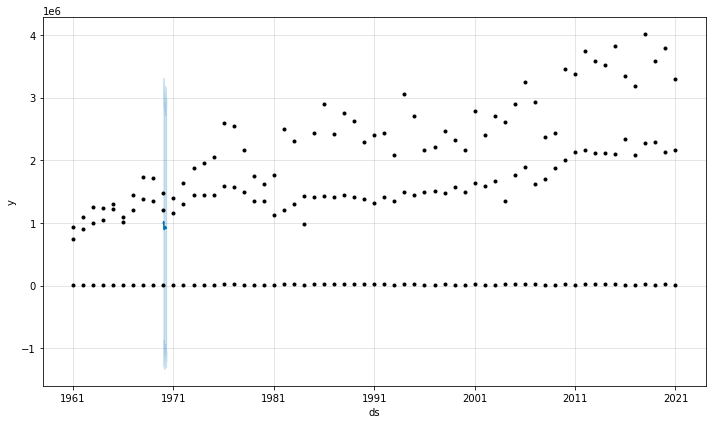

In [14]:
plot1 = m.plot(forecast)
